## Crypto price analysis in Python / Jupyter Notebooks

In [50]:
# import basic packages and make our matplotlib figures display in this notebook
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


### CryptoCompare API

In [56]:
def get_data(date):
    """ Query the API for 2000 days historical price data starting from "date". """
    url = "https://min-api.cryptocompare.com/data/histoday?fsym=BTC&tsym=USD&limit=2000&toTs={}".format(date)
    r = requests.get(url)
    ipdata = r.json()
    return ipdata

In [57]:
def get_df(from_date, to_date):
    """ Get historical price data between two dates. """
    date = to_date
    holder = []
    # While the earliest date returned is later than the earliest date requested, keep on querying the API
    # and adding the results to a list. 
    while date > from_date:
        data = get_data(date)
        holder.append(pd.DataFrame(data['Data']))
        date = data['TimeFrom']
    # Join together all of the API queries in the list.    
    df = pd.concat(holder, axis = 0)                    
    # Remove data points from before from_date
    df = df[df['time']>from_date]                       
    # Convert to timestamp to readable date format
    df['time'] = pd.to_datetime(df['time'], unit='s')   
    # Make the DataFrame index the time
    df.set_index('time', inplace=True)                  
    # And sort it so its in time order 
    df.sort_index(ascending=False, inplace=True)        
    return df

In [70]:
# function arguments: UNIX time inputs
df = get_df(1371059806, 1534435200)

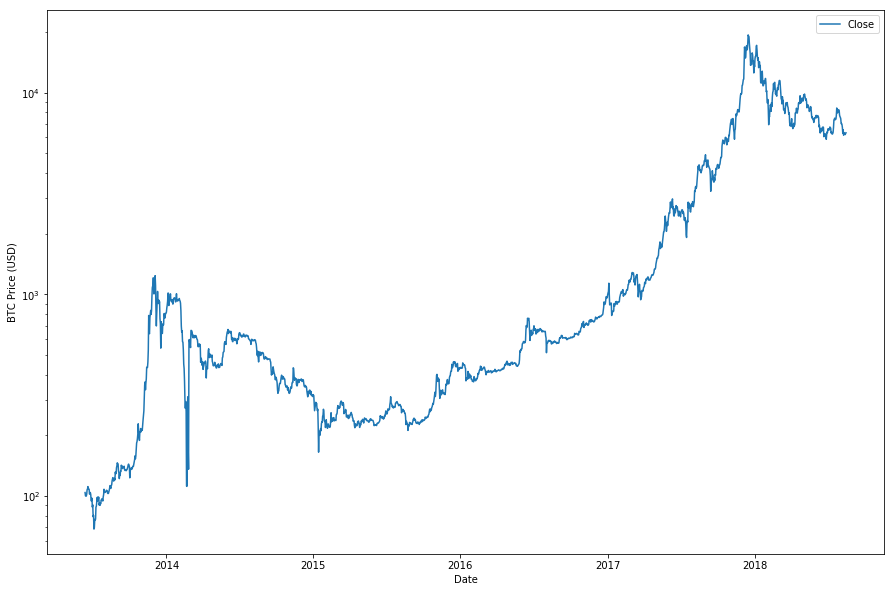

In [71]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(df[['close']])
ax.set_ylabel('BTC Price (USD)')
ax.set_xlabel('Date')
ax.legend(['Close']);
ax.set_yscale('log')